In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
import scipy as sp
import math
from datetime import date
from datetime import datetime

from IPython.display import Image

In [2]:
data = pd.read_excel('FNCL 5.5.xlsx')
data=data.dropna(axis=0, how='any')
data.head() # sample of dataset

,Date,PX_LAST,PX_MID,FNCL 5.5,Unnamed: 4
1,2017-06-16,3.80,3.80,111.109375,2.27
2,2017-06-09,3.83,3.83,111.296875,2.22
3,2017-06-02,3.76,3.76,111.390625,2.20
4,2017-05-26,3.81,3.81,111.328125,2.22
5,2017-05-19,3.85,3.85,111.359375,2.21


In [3]:
date=data["Date"]
data["DDate"]=pd.to_datetime(date)
data['Year'] = data['DDate'].dt.year

## Graph Plotting

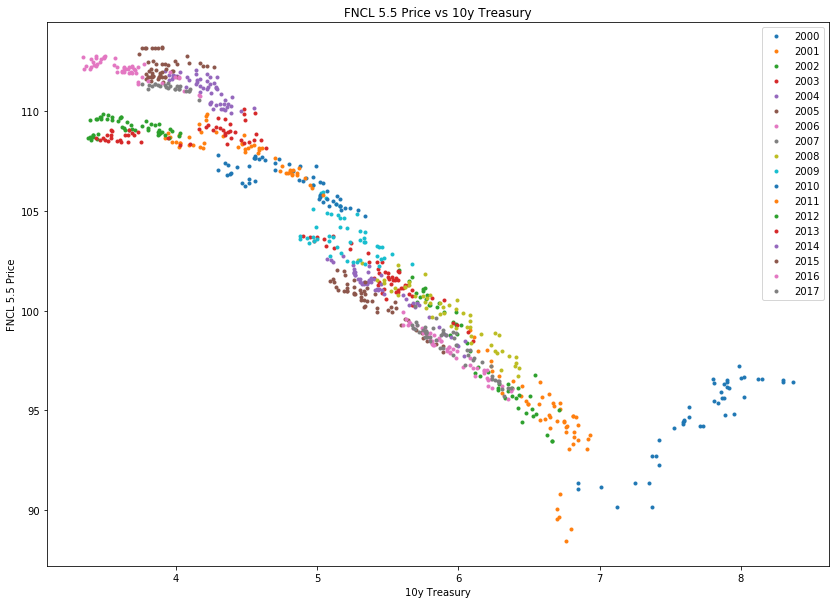

In [4]:
def plot_setting(data):
    x=data['PX_MID']
    y=data['FNCL 5.5']
    labels = data['Year']
    df = pd.DataFrame(dict(x=x, y=y, label=labels)).copy()
    groups = df.groupby('label')   
    # Plot
    colorlimit=len(data['Year'].unique()) 
    #plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
    fig, ax = plt.subplots(figsize=(14, 10))
    #colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
    #ax.set_color_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='',ms=3, label=name)
    ax.legend(numpoints=1)
    plt.title('FNCL 5.5 Price vs 10y Treasury')
    plt.xlabel('10y Treasury')
    plt.ylabel('FNCL 5.5 Price')
    return None;

plot_setting(data=data)
plt.show()


## Summary Statistics

In [5]:
year_mean=data.groupby(data["Year"])[["FNCL 5.5","PX_MID"]].mean()
year_std=data.groupby(data["Year"])[["FNCL 5.5","PX_MID"]].std()
year_summary=pd.concat([year_mean, year_std], join="outer",axis=1,keys="Year")
#print(year_summary)

In [6]:
year=np.asarray(range(2000,2018))
def plot_ts(m,s,y,ylable,title):
    x_a=np.asarray(m)
    xu_a=np.asarray(m+1.96*s)
    xd_a=np.asarray(m-1.96*s)
    plt.plot(y,x_a,color='r')
    plt.plot(y,xu_a,color='r',ls="dashed")
    plt.plot(y,xd_a,color='r',ls="dashed")
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylable)
    return None

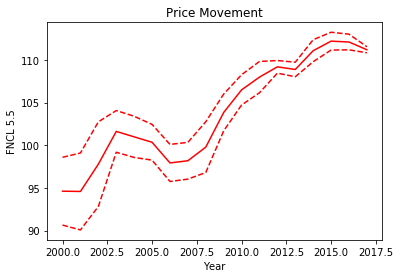

In [7]:
plot_ts(year_mean["FNCL 5.5"],year_std["FNCL 5.5"],year,"FNCL 5.5","Price Movement")

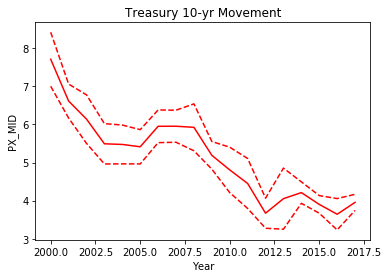

In [8]:
plot_ts(year_mean["PX_MID"],year_std["PX_MID"],year,"PX_MID","Treasury 10-yr Movement")

## Polynomial fitting

In [9]:
def plotPoly(order,data):
    x=data['PX_MID']
    y=data['FNCL 5.5']
    
    # Calculate Coef
    coef = np.polyfit(x, y, order)
    z=0
    for n in np.arange(order,-1,-1):
        z+=coef[n]*x**(order-n)
        
    plot_setting(data=data)
    plt.plot(x,z,color='r')
    plt.show()
    formula='y = '+str(coef[order])
    if order > 1:
        for n in np.arange(order-1,-1,-1):
            formula += (' + ' if coef[n]>0 else ' ') + str(coef[n])+'x^'+str(order-n)+' '
    print(formula)     
    print('R square is ',1-np.sum((z-y)**2)/np.sum((y-np.mean(y))**2))
    print('Squared error is ',np.sum((z-y)**2))

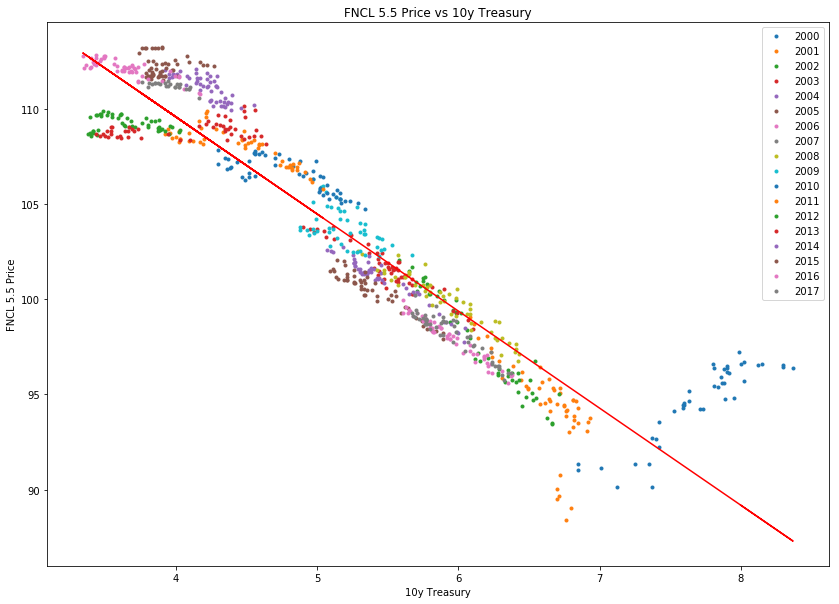

y = 129.921995962
R square is  0.8842894009210509
Squared error is  3755.5945974571077


In [10]:
plotPoly(1,data)

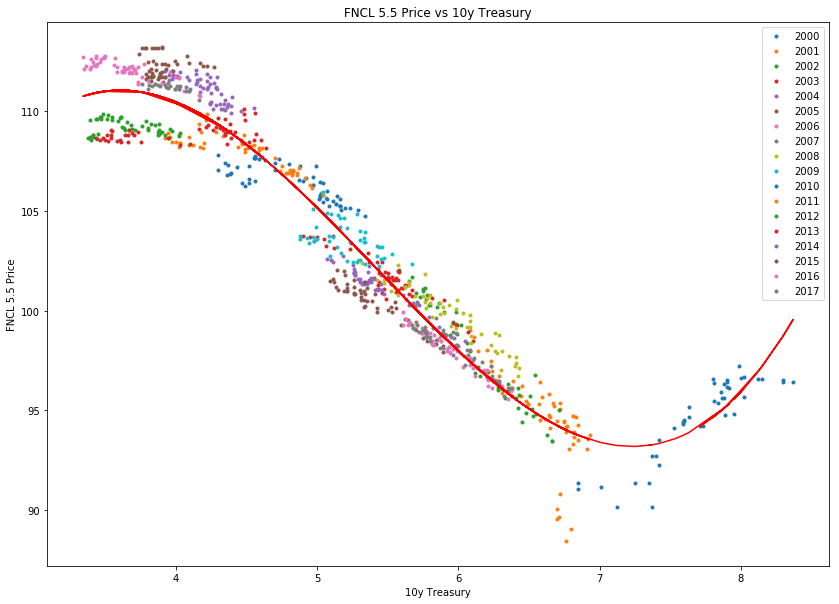

y = 23.0908106699 + 58.5319375418x^1  -12.1651237696x^2  + 0.74831888465x^3 
R square is  0.9509321560489133
Squared error is  1592.584699400239


In [11]:
plotPoly(3,data)

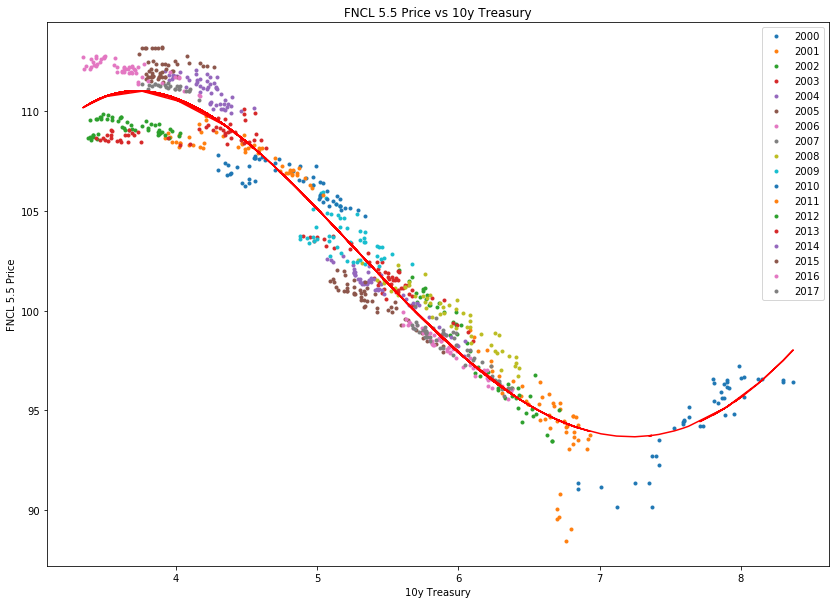

y = -50.5177367589 + 114.908020759x^1  -27.933493568x^2  + 2.65822150009x^3  -0.084561939867x^4 
R square is  0.9519516348297654
Squared error is  1559.495690855931


In [12]:
plotPoly(4,data)

## Exponential Fitting

In [13]:
def plotExp(order,data):
    x=data['PX_MID']
    y=data['FNCL 5.5']
    
    # Calculate Coef
    new_y = np.log(y)
    coef = np.polyfit(x, new_y, order)
    z=0
    for n in np.arange(order,-1,-1):
        z+=coef[n]*x**(order-n)
    new_z = np.exp(z)
    plot_setting(data=data)
    plt.plot(x,new_z,color='r')
    plt.show()
    formula='y = exp^('+str(coef[order])
    if order > 1:
        for n in np.arange(order-1,-1,-1):
            formula += (' + ' if coef[n]>0 else ' ') + str(coef[n])+'x^'+str(order-n)+' '
    print(formula +')')     
    print('R square is ',1-np.sum((new_z-y)**2)/np.sum((new_z-np.mean(y))**2))
    print('Squared error is ',np.sum((z-y)**2))

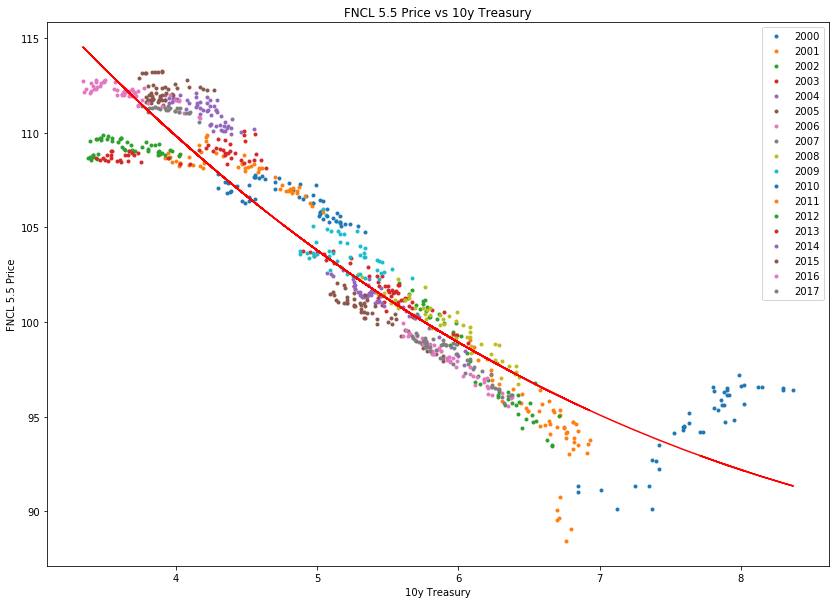

y = exp^(5.01012585555 -0.09486416524x^1  + 0.00426197750086x^2 )
R square is  0.8859086237628409
Squared error is  8882772.132556846


In [14]:
plotExp(2,data)

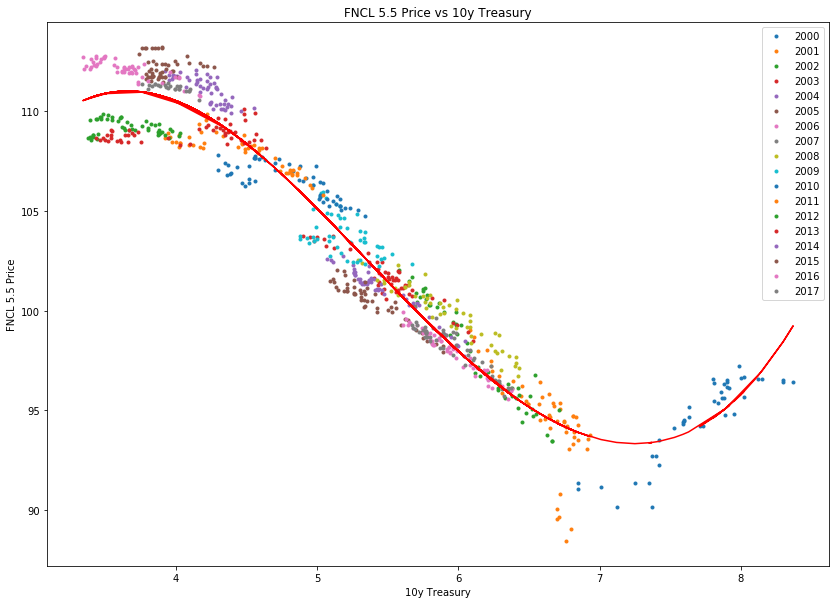

y = exp^(3.80129592728 + 0.596996066196x^1  -0.122759453865x^2  + 0.00750272893114x^3 )
R square is  0.949023334115048
Squared error is  8882739.014409289


In [15]:
plotExp(3,data)

## Economic explanation

What we found in this graph is a clear shift from below to above
This indicates that something other than our reference rate 
changed during the time period 2013-2014
A possible explanation is that Fed 3rd QE program starts at Sept. 2012
The purchase of the MBS will in general depress the market price
However, later the effect of the QE is less and less. 
Thus the market goes back to higher level.
We are going to discuss this topic with our Fixed Income Porfessor.

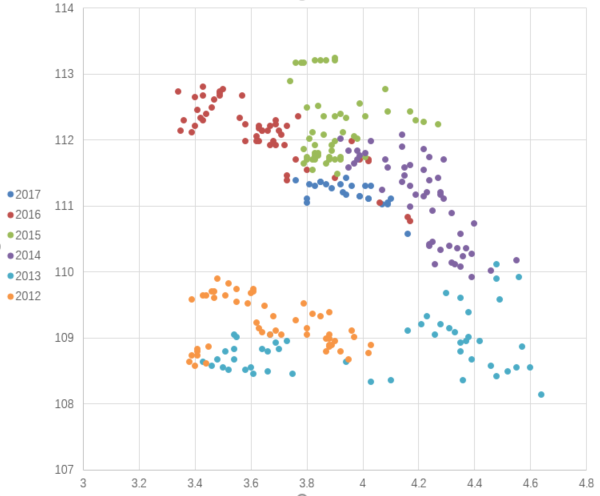

In [16]:
Image(filename='week2.png')

In next step we may use a more sophisticated model to incorporate these economic factors into the model